In [1]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download()

<Axes: title={'center': 'Target ID: 8462852, Cadence: 66714'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

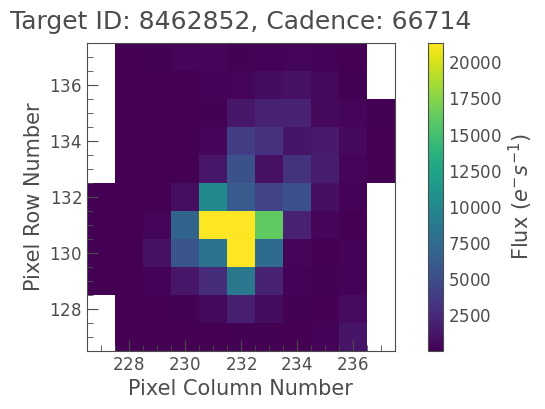

In [2]:
pixelfile.plot(frame=1)

In [3]:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [4]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.91762194 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258948.84, 258884.66,
            258865.6 ] electron / s>)

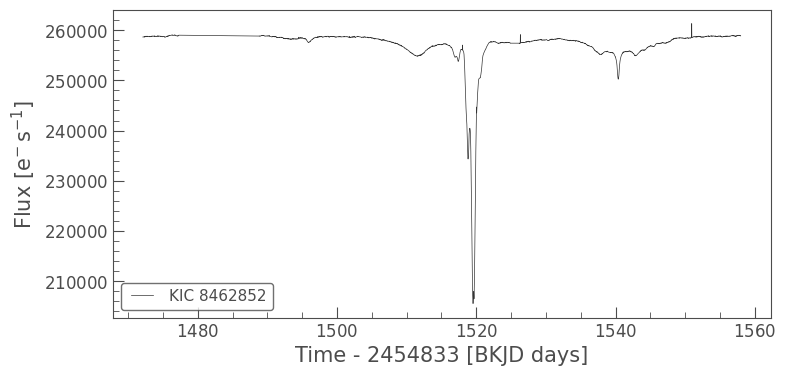

In [5]:
lc.plot()
plt.show()

##### Search for a new star pixelfile

In [7]:
new_pixelfile = search_targetpixelfile("KIC 6922244", quarter=4).download_all()

In [11]:
star = new_pixelfile[3].to_lightcurve(aperture_mask='all')

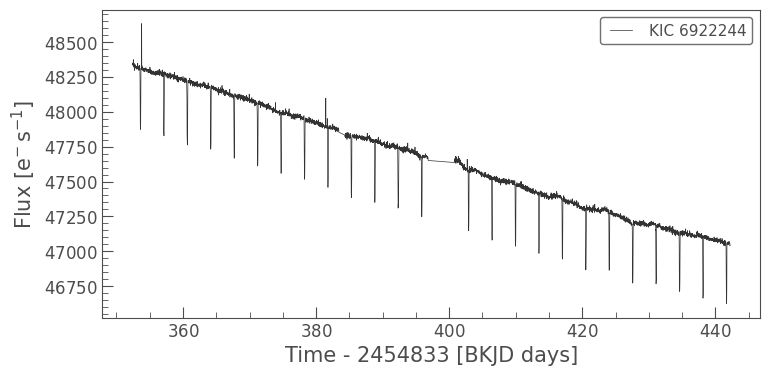

In [12]:
star.plot()
plt.show()

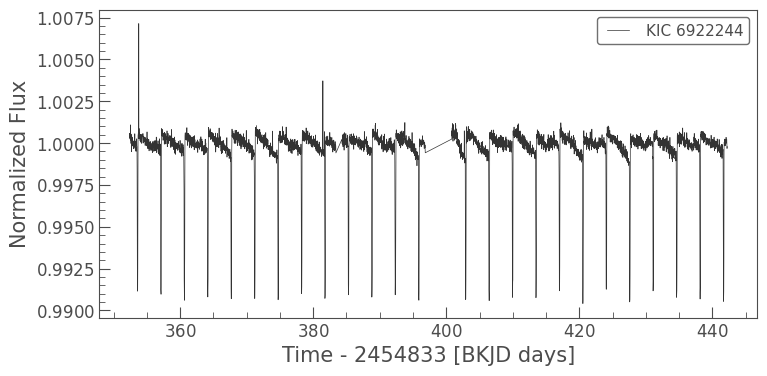

In [13]:
flat_star = star.flatten(window_length=401)
flat_star.plot()
plt.show()

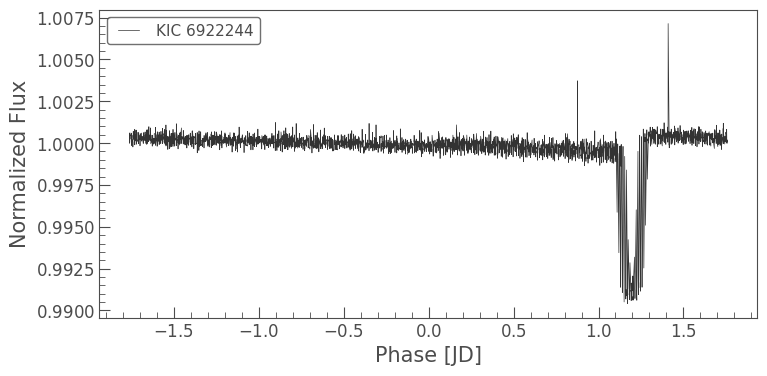

In [14]:
folded_star = flat_star.fold(period=3.525)
folded_star.plot()
plt.show()

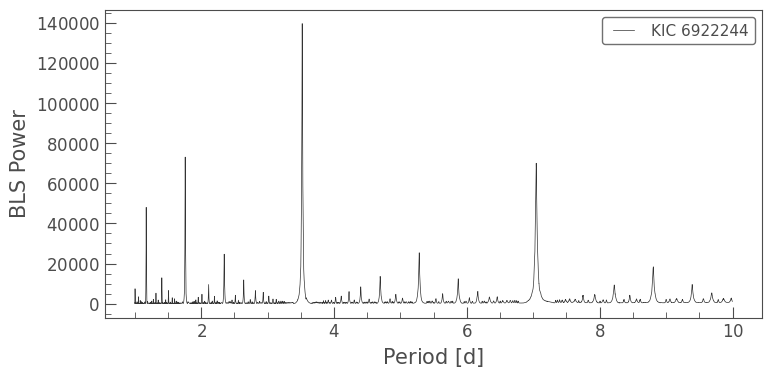

In [15]:
import numpy as np
periodogram = flat_star.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [16]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 3.522 d
